# Revenue & Product Analysis for a Digital SaaS

### Introduction

In this project, we analyze the product and revenue performance of a fictional digital SaaS platform that enables creators to sell digital products like courses, templates, e-books, and memberships — inspired by tools like [Stan](https://www.stan.store/) and [The Leap](https://www.theleap.co/)

The goal of this analysis is to identify key revenue trends, explore product performance, and highlight where the platform can optimize marketing and product strategy. 

The dataset used in this analysis is artificially generated.

> 📌 Note: This project is part of my personal portfolio and was created for learning and demonstration purposes only.

### Table of Contents
- Tools & Skills Used
- Asking Questions  
- Data Wrangling  
- Exploratory Data Analysis  
- Key Insights & Recommendations  
- Conclusions  

### Tools & Skills Used  
- Python (Pandas) for data manipulation and cleaning  
- Data wrangling techniques to handle missing values and duplicates  
- Exploratory Data Analysis (EDA) with Seaborn & Matplotlib  
- Basic statistics for hypothesis testing and trend analysis
- Business storytelling to connect data insights with actionable recommendations

### Asking Questions
Based on the dataset, we are interested in exploring the following questions:

**Q1:** What product types drive the most revenue efficiency (revenue per order)?

**Q2:** How does product performance vary across different creator niches (e.g. Business, Wellness, Finance)?  

**Q3:** Are there any monthly or seasonal trends in revenue over time?

**Q4:** Is there a price “sweet spot” that balances volume and revenue?

**Q5:** What do top-performing creators have in common: pricing? niche? product type?

The insights generated from these questions will inform product enhancements, pricing strategies, and targeted marketing campaigns to help the platform grow revenue and better support creators.

---

### Data Wrangling

In this section, we prepare the environment, load the dataset, and clean the data to ensure quality for further analysis.

#### Preparing the Environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in data
df = pd.read_csv("saas_revenue_data.csv")
df.head()

,creator_id,product,order_type,order_date,order_value,niche
0,creator_2,E-book,renewal,2023-11-01,45.49,Wellness
1,creator_8,1-on-1 Coaching,new,2024-06-01,46.34,Business
2,creator_18,1-on-1 Coaching,new,2023-08-01,60.35,Fitness
3,creator_11,1-on-1 Coaching,new,2023-10-01,43.95,Finance
4,creator_18,Template Pack,new,2023-04-01,46.56,Finance


#### Inspect Data
We will run a few queries to get these information from our data set.

- What are the data types?
- Are there any duplicated rows and if yes, how many?
- Is there any missing values and if yes, how many?
- What are the unique values and what is the count?

In [3]:
# datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   creator_id   1110 non-null   object
 1   product      1057 non-null   object
 2   order_type   1110 non-null   object
 3   order_date   1110 non-null   object
 4   order_value  1110 non-null   object
 5   niche        1110 non-null   object
dtypes: object(6)
memory usage: 52.2+ KB


In [4]:
# duplicate rows
df.duplicated().sum()

2

In [5]:
# features with missing values
df.isnull().sum()

creator_id      0
product        53
order_type      0
order_date      0
order_value     0
niche           0
dtype: int64

In [6]:
# number of non-null unique values for features in the dataset
df.nunique()

creator_id      20
product          5
order_type       3
order_date      18
order_value    963
niche            8
dtype: int64

In [7]:
df.describe(include='all')

,creator_id,product,order_type,order_date,order_value,niche
count,1110,1057,1110,1110,1110,1110
unique,20,5,3,18,963,8
top,creator_4,E-book,new,2023-04-01,unknown,Wellness
freq,72,229,386,81,36,155


**Observations:**

- `order_value` and `order_date` are incorrectly stored as `object` type

- `product` has 53 missing values

- `order_value` contains some non-numeric values like 'unknown'

- There are 2 duplicated rows

#### Cleaning the Data

**1. Convert order_value to float**

We'll coerce invalid values (e.g. 'unknown') into NaN.


In [8]:
df['order_value'] = pd.to_numeric(df['order_value'], errors='coerce')

**2. Convert order_date to datetime**

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [10]:
# Check again
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   creator_id   1110 non-null   object        
 1   product      1057 non-null   object        
 2   order_type   1110 non-null   object        
 3   order_date   1110 non-null   datetime64[ns]
 4   order_value  1074 non-null   float64       
 5   niche        1110 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 52.2+ KB


,creator_id,product,order_type,order_date,order_value,niche
count,1110,1057,1110,1110,1074.000000,1110
unique,20,5,3,NaN,NaN,8
top,creator_4,E-book,new,NaN,NaN,Wellness
freq,72,229,386,NaN,NaN,155
mean,NaN,NaN,NaN,2023-09-15 11:54:48.648648704,37.642877,NaN
min,NaN,NaN,NaN,2023-01-01 00:00:00,-15.290000,NaN
25%,NaN,NaN,NaN,2023-05-01 00:00:00,26.682500,NaN
50%,NaN,NaN,NaN,2023-09-01 00:00:00,37.510000,NaN
75%,NaN,NaN,NaN,2024-02-01 00:00:00,49.177500,NaN
max,NaN,NaN,NaN,2024-06-01 00:00:00,90.400000,NaN


**New Observations:**

- `order_value` contains negative values which aren't valid in this context. We'll handle this in the next step.

**3. Handle invalid & missing values**

In [11]:
# order_value: Since negative prices aren't valid in this context, and NaN rows can't be used, we’ll remove them.
df = df[df['order_value'].notnull()]
df = df[df['order_value'] >= 0]

In [12]:
# Missing product: We’ll label missing `product` as "Unknown" to preserve the data.
df["product"] = df["product"].fillna("Unknown")

**4. Remove duplicates**

In [13]:
df = df.drop_duplicates()

In [14]:
# Confirm clean data
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   creator_id   1055 non-null   object        
 1   product      1055 non-null   object        
 2   order_type   1055 non-null   object        
 3   order_date   1055 non-null   datetime64[ns]
 4   order_value  1055 non-null   float64       
 5   niche        1055 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 57.7+ KB


,creator_id,product,order_type,order_date,order_value,niche
count,1055,1055,1055,1055,1055.000000,1055
unique,20,6,3,NaN,NaN,8
top,creator_17,E-book,new,NaN,NaN,Wellness
freq,65,216,368,NaN,NaN,149
mean,NaN,NaN,NaN,2023-09-14 13:34:51.753554432,38.339460,NaN
min,NaN,NaN,NaN,2023-01-01 00:00:00,0.500000,NaN
25%,NaN,NaN,NaN,2023-05-01 00:00:00,27.135000,NaN
50%,NaN,NaN,NaN,2023-09-01 00:00:00,37.840000,NaN
75%,NaN,NaN,NaN,2024-02-01 00:00:00,49.360000,NaN
max,NaN,NaN,NaN,2024-06-01 00:00:00,90.400000,NaN


---

#### Exploratory Data Analysis
#### Q1: What product types drive the most revenue efficiency (revenue per order)?

In [15]:
# Group the data by product and aggregate total revenue and total order count
product_group = df.groupby('product').agg({
    'order_value': ['sum', 'count']
})

# Rename columns for clarity
product_group.columns = ['total_revenue', 'total_orders']
product_group = product_group.reset_index()

# Preview the result
print(product_group)

           product  total_revenue  total_orders
0  1-on-1 Coaching        7301.21           197
1           E-book        8236.18           216
2       Membership        8130.94           203
3    Online Course        6776.44           183
4    Template Pack        8011.49           208
5          Unknown        1991.87            48


In [16]:
# Create a new column to measure revenue efficiency
product_group['revenue_per_order'] = product_group['total_revenue'] / product_group['total_orders']
print(product_group)

           product  total_revenue  total_orders  revenue_per_order
0  1-on-1 Coaching        7301.21           197          37.061980
1           E-book        8236.18           216          38.130463
2       Membership        8130.94           203          40.053892
3    Online Course        6776.44           183          37.029727
4    Template Pack        8011.49           208          38.516779
5          Unknown        1991.87            48          41.497292


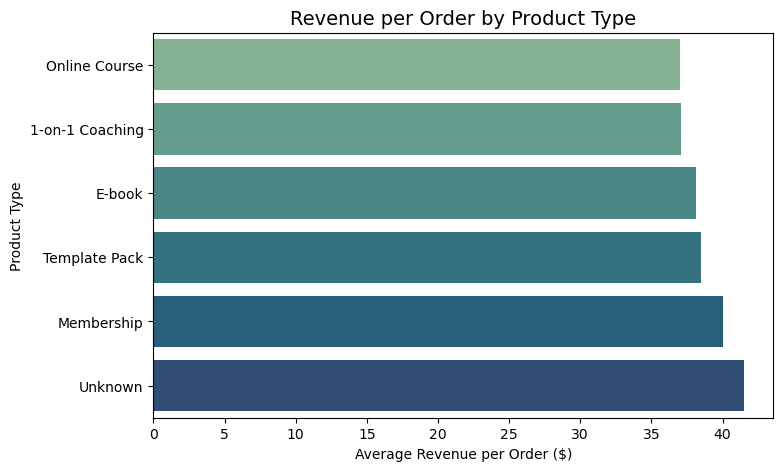

In [17]:
# Sort by revenue_per_order for better visual clarity
sorted_group = product_group.sort_values('revenue_per_order', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(
    data = sorted_group,
    x = 'revenue_per_order',
    y = 'product',
    hue = 'product',
    palette = 'crest',
    legend = False
)

plt.title('Revenue per Order by Product Type', fontsize=14)
plt.xlabel('Average Revenue per Order ($)')
plt.ylabel('Product Type')
plt.show()

**📌 Note:**

The `Unknown` product type represents rows where the product name was missing. While its revenue efficiency appears highest, it's excluded from strategic insights due to data quality concerns.

**📈 Insights:**
- Among all defined product categories, `Memberships` deliver the highest revenue per order, suggesting strong value perception or pricing power.
- Close contenders include `Template Packs` and `E-books`, both offering consistent revenue efficiency.
These insights can guide the platform's product development, creator education, or promotional efforts toward top-performing formats.

**💡 Actionable Recommendation**

Focus on promoting high value products like courses or memberships to increase revenue efficiency.

---
#### Q2: How does product performance vary across different creator niches (e.g. Business, Wellness, Finance)?

In [56]:
# Grouping total revenue by both niche and product
niche_group = df.groupby("niche").agg(total_revenue=("order_value", "sum")).reset_index()

# Display top results
niche_group_sorted = niche_group.sort_values(by="total_revenue", ascending=False)
print(niche_group_sorted.head(10))

                  niche  total_revenue
7              Wellness        5676.57
4               Fitness        5654.41
3               Finance        5619.96
0      Beauty/Lifestyle        5285.41
2                Career        5111.71
5  Personal Development        4753.64
1              Business        4375.26
6          Productivity        3971.17


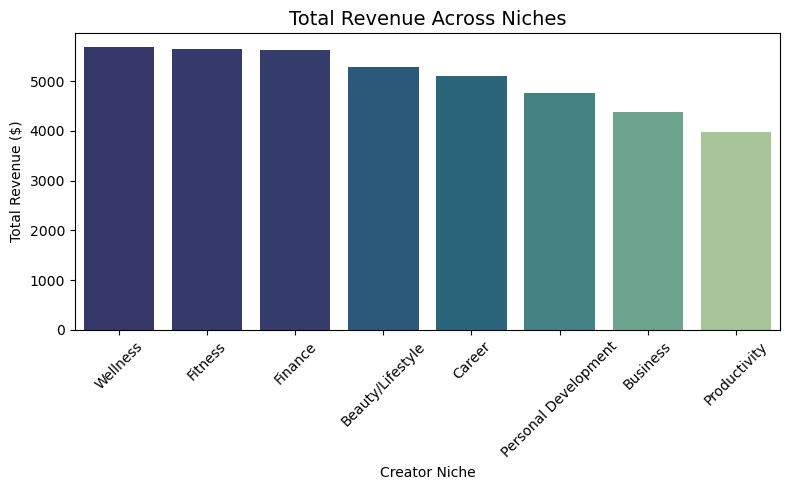

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(
    data = niche_group_sorted,
    x = "niche",
    y = "total_revenue",
    palette = 'crest',
    hue = 'total_revenue',
    legend = False
)

plt.title("Total Revenue Across Niches", fontsize=14)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Creator Niche")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**📈 Insights**

The Wellness, Fitness, and Finance niches generate the most total revenue.

---
#### Q3: Are there any monthly or seasonal trends in revenue over time?

In [20]:
# Create a new column with Month-Year format
df['order_month'] = df['order_date'].dt.to_period('M')

# Group by month and calculate total revenue
monthly_revenue = df.groupby('order_month')['order_value'].sum().reset_index()

# Convert 'order_month' back to string for plotting
monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)

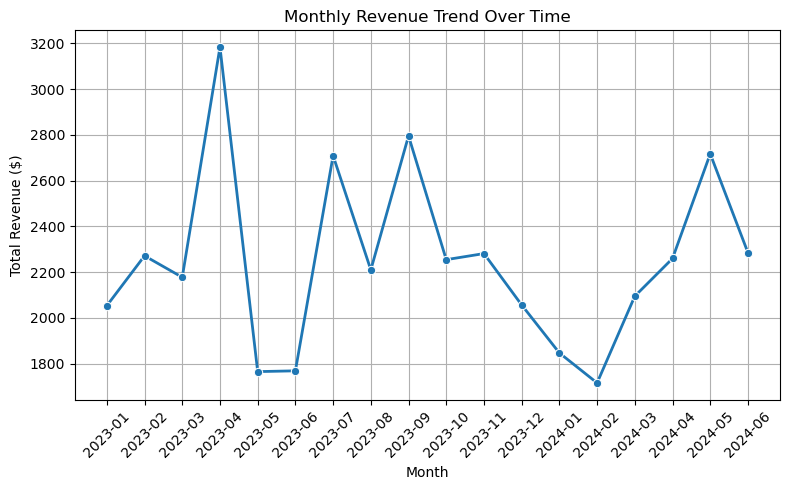

In [34]:
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_revenue, x='order_month', y='order_value', marker='o', linewidth=2)
plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**📈 Insights**

- *April 2023* had the *highest* revenue spike across the dataset. This might be from a seasonal campaign or a strong creator/product push.
- Revenue *dipped* in *May 2023, June 2023, and February 2024*. These slowdowns could be due to post-holiday fatigue, low customer demand, or less creator activity.

There’s a clear pattern: after a few slow months, revenue tends to bounce back, likely when creators drop new products or the platform runs promotions.

---
#### Q4: What pricing ranges tend to perform best across different product types?

First, we create price ranges.

In [25]:
df['price_range'] = pd.cut(df['order_value'],
                           bins=[0, 20, 40, 60, 80, 100],
                           labels=['<$20', '$20 - $40', '$40 - $60', '$60 - $80', '$80+'])

Then, we group by product & price range to see what performs best.

In [37]:
result = df.groupby(['product', 'price_range'], observed=True)['order_value'].agg(['count', 'sum']).reset_index()
result.columns = ['product', 'price_range', 'num_orders', 'total_revenue']

print(result.sort_values(by='total_revenue', ascending=False).head(10))

            product price_range  num_orders  total_revenue
6            E-book   $40 - $60          82        3978.48
2   1-on-1 Coaching   $40 - $60          75        3724.82
21    Template Pack   $40 - $60          76        3619.80
11       Membership   $40 - $60          70        3453.57
20    Template Pack   $20 - $40          89        2810.76
15    Online Course   $20 - $40          87        2659.68
10       Membership   $20 - $40          81        2644.19
5            E-book   $20 - $40          87        2590.77
16    Online Course   $40 - $60          51        2432.53
1   1-on-1 Coaching   $20 - $40          76        2327.73


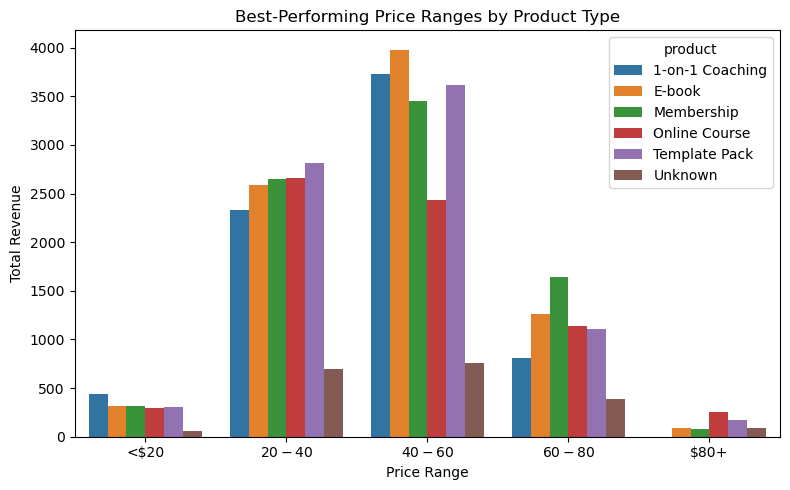

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='price_range', y='total_revenue', hue='product')
plt.title('Best-Performing Price Ranges by Product Type')
plt.ylabel('Total Revenue')
plt.xlabel('Price Range')
plt.tight_layout()
plt.show()


**📈 Insights**
- The *$40–$60 price range* consistently drives the highest total revenue across all product types.
- *$20–$40* is the second-best performing range and shows strong results for Template Packs.
- *$80+ and <$20 pricing* generate minimal revenue across the board.

---
#### Q5: Who are the top-performing creators, and what types of products do they sell most?

In [ ]:
# Total revenue and most common product per creator
top_creators = df.groupby('creator_id').agg(
    total_revenue=('order_value', 'sum'),
    total_orders=('order_value', 'count'),
    top_product=('product', lambda x: x.mode()[0])
).sort_values(by='total_revenue', ascending=False).reset_index()

print(top_creators)

    creator_id  total_revenue  total_orders      top_product
0    creator_4        2635.13            64    Template Pack
1   creator_17        2521.67            65  1-on-1 Coaching
2    creator_9        2429.05            58       Membership
3   creator_10        2303.36            60    Online Course
4   creator_15        2260.97            63  1-on-1 Coaching
5   creator_20        2251.27            57       Membership
6   creator_18        2236.08            56    Template Pack
7   creator_14        2210.74            61    Template Pack
8    creator_6        2065.74            51       Membership
9    creator_1        2038.50            54           E-book
10   creator_8        1926.12            51    Template Pack
11   creator_3        1877.56            49    Template Pack
12  creator_11        1857.69            49           E-book
13  creator_19        1804.43            46  1-on-1 Coaching
14  creator_13        1779.13            46  1-on-1 Coaching
15  creator_16        17

**📈 Insights**
- *Creator_4 leads in total revenue ($2,635.13)*, with Template Packs being their best-selling product.
- 1-on-1 Coaching shows up frequently in the top-performing creators (e.g., creator_17, _15, _13, _5), highlighting strong demand for personalized offerings.
- Memberships and E-books are also popular and revenue-generating, proving that scalable content remains a strong monetization model.